### Business context: in the last month, some cybersecurity events with different durations and patterns have been registered

#### problem statement:   what can we drive

In [64]:
#1 most targeted destination IP address 
#2 MOST logical parts attacked
#3 most frequently/ common type of attack 
#4 different time of the day , (odd, hours, day or night)
#5 find the pattern 

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


In [66]:
df=pd.read_csv("Cybersecurity_attacks.csv")

In [67]:
df.head(4)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417


In [68]:
df[['start time','last time']]=df['Time'].str.split('-', expand=True)
df.head()


,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,start time,last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


In [69]:
df['.'].unique()

array(['.'], dtype=object)

In [70]:
df=df.drop(['.','Time'],axis=1)#drop columns and make a copy in memeory of the object
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,start time,last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [71]:
df.shape

(178031, 11)

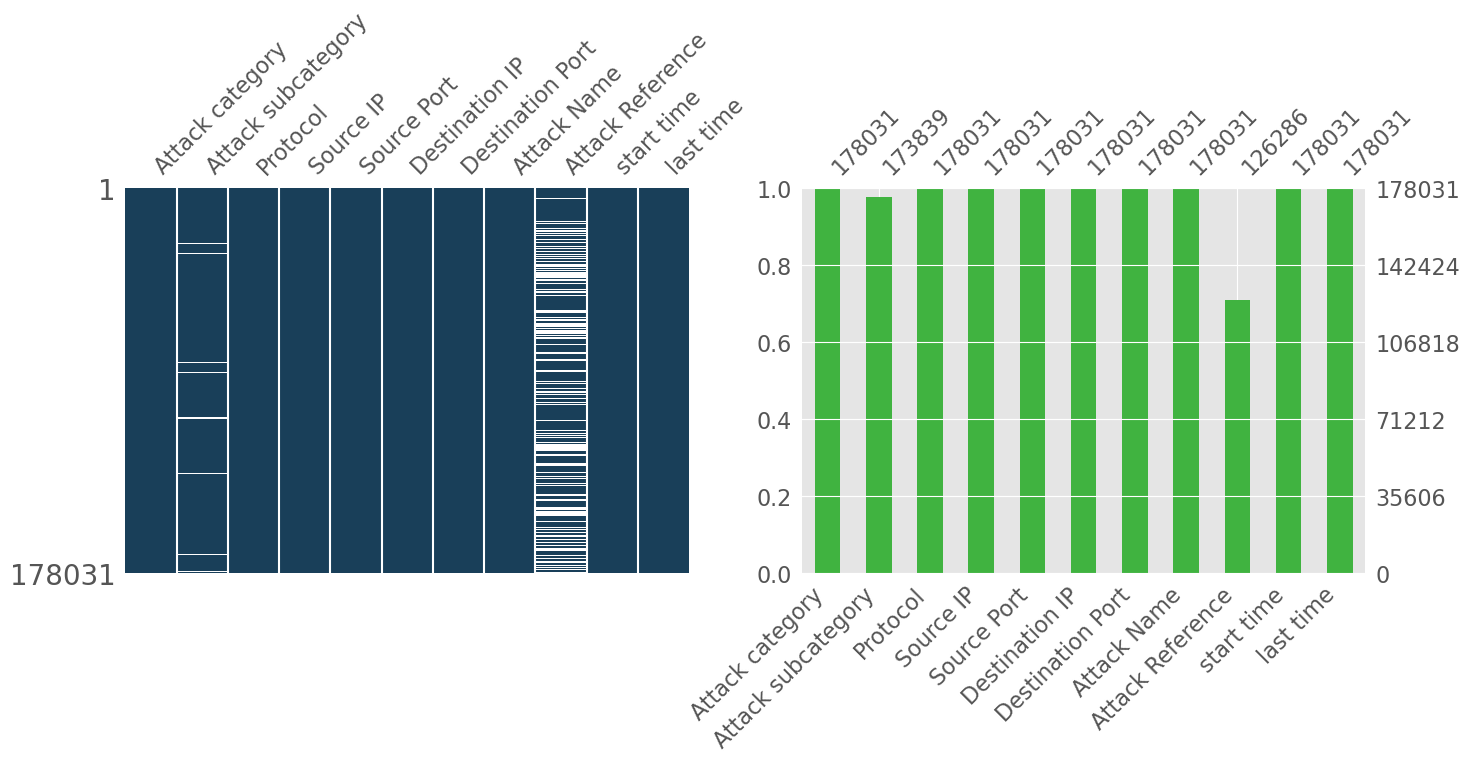

In [72]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df, ax=ax2, color=(0.25, 0.7, 0.25))
plt.show()

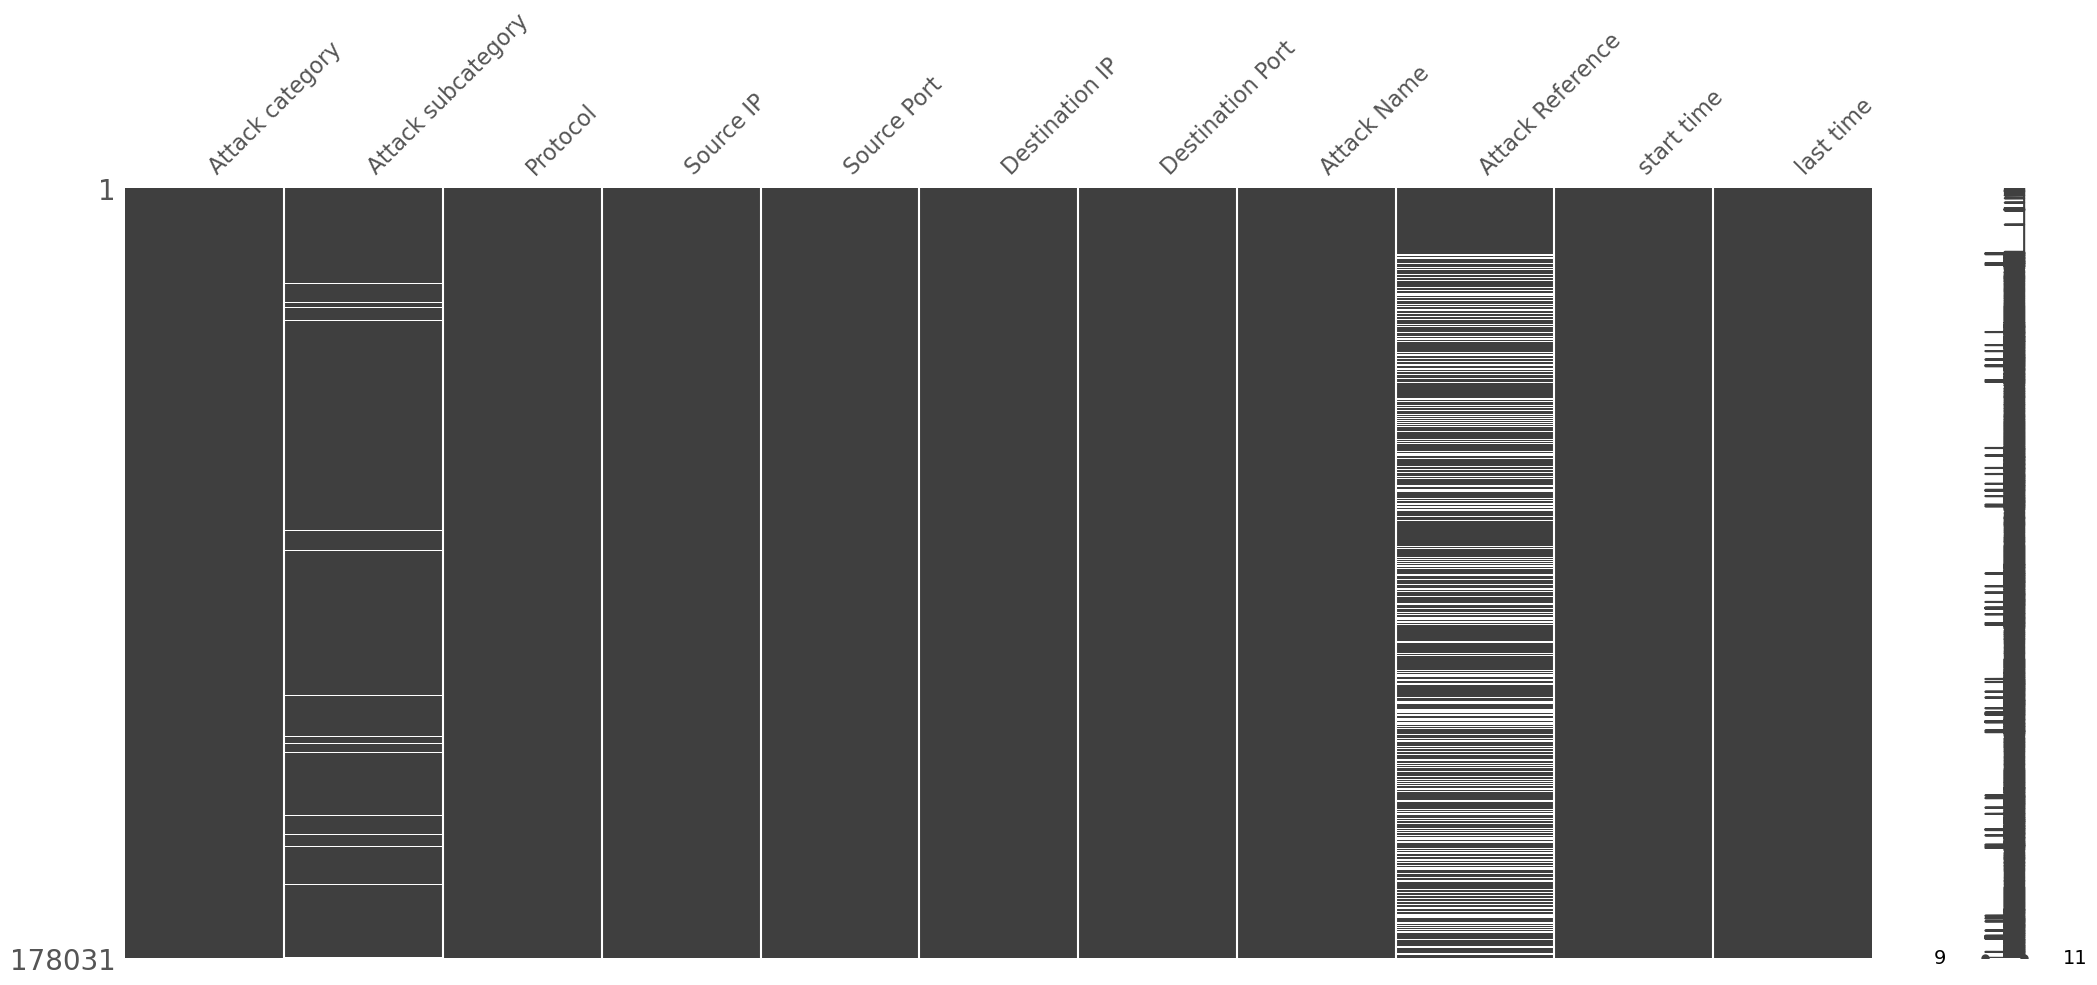

In [73]:

msno.matrix(df)
plt.show()
# figure shows that there are misssing values in attack subcategory and attack reference

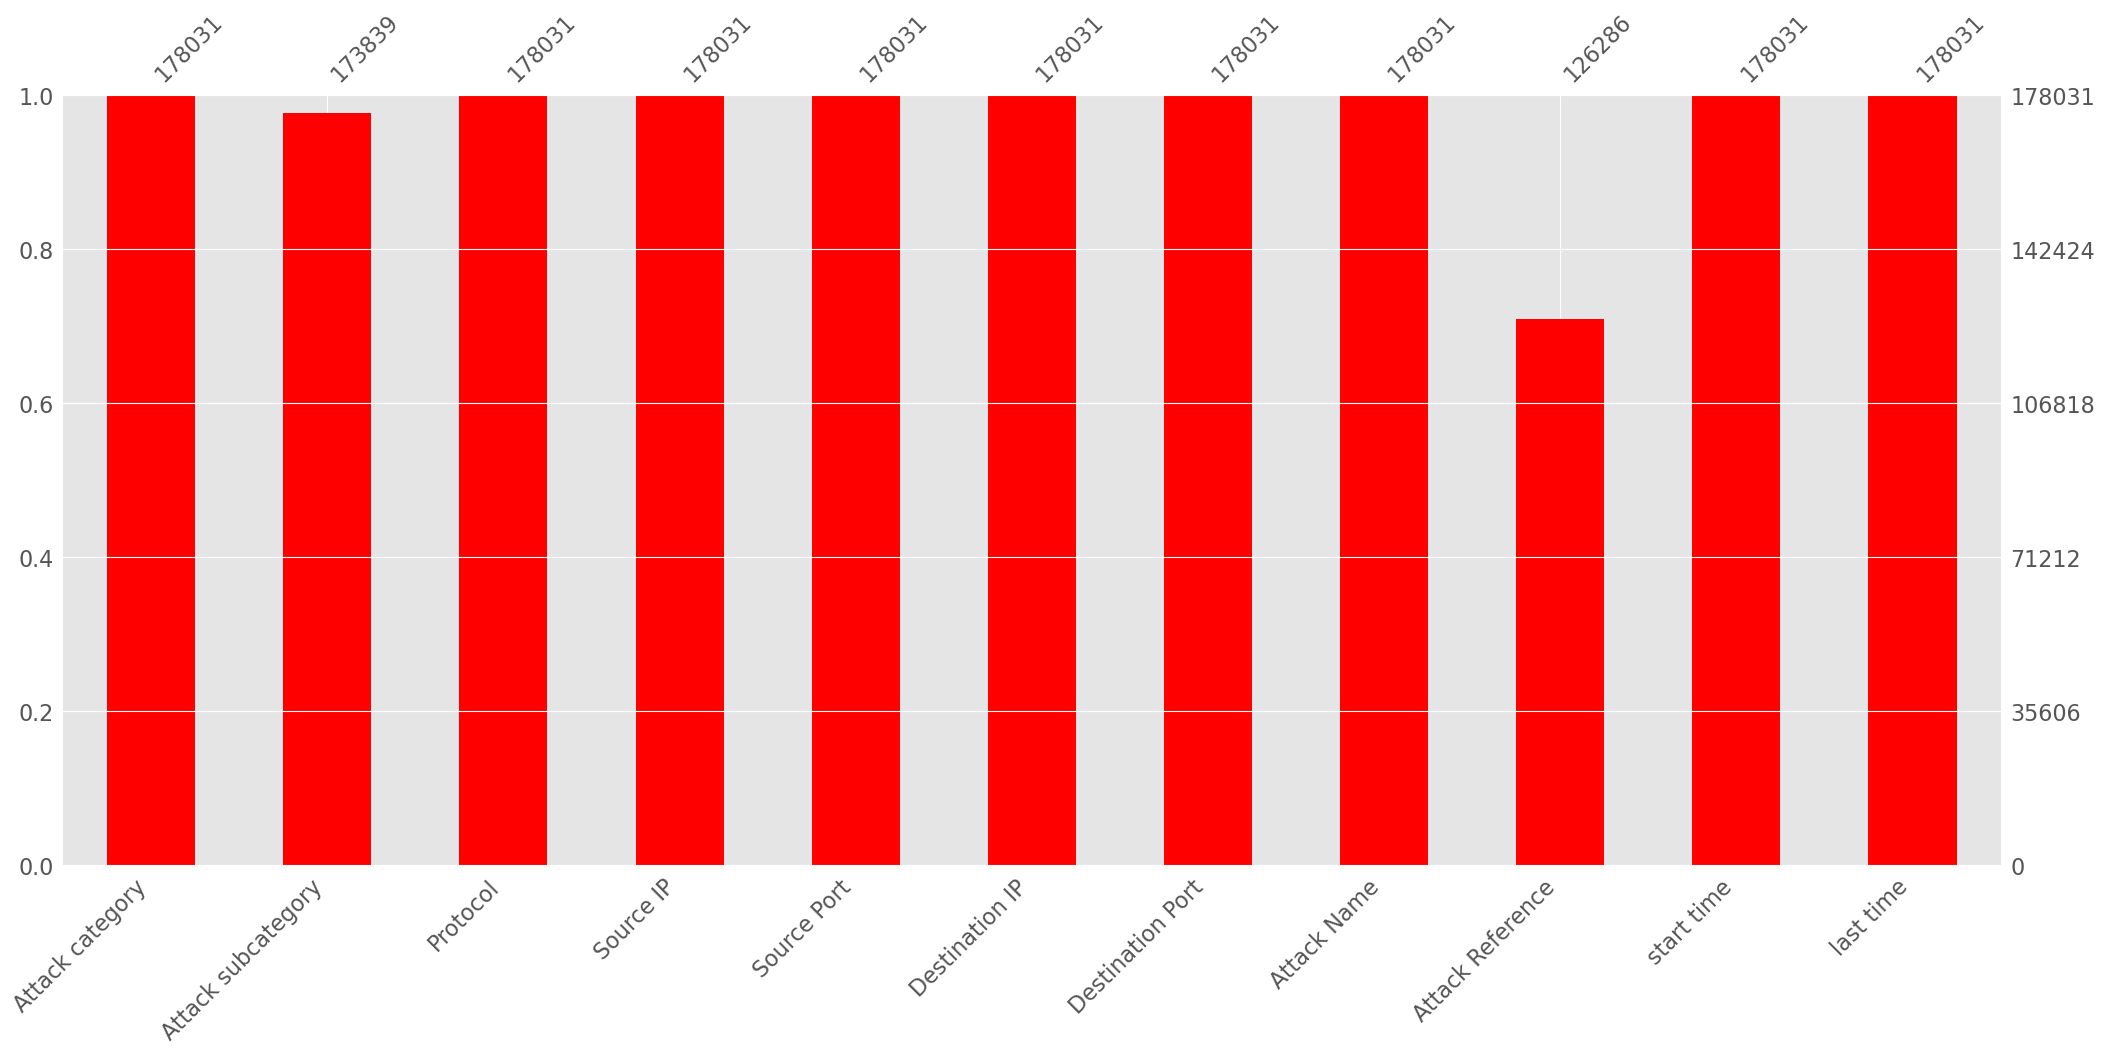

In [74]:

msno.bar(df, color="r")
plt.show()


In [75]:
df.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
start time                0
last time                 0
dtype: int64

In [76]:
df["Attack subcategory"]=df["Attack subcategory"].fillna("Not registered")

In [77]:
df.isnull().sum()

Attack category           0
Attack subcategory        0
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
start time                0
last time                 0
dtype: int64

In [78]:
df[pd.isnull(df).any(axis=1)].shape

(51745, 11)

In [79]:
df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,start time,last time
32881,Exploits,Browser,ospf,175.45.176.1,0,149.171.126.16,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424223999,1424224029
40645,Exploits,Browser,ospf,175.45.176.3,0,149.171.126.13,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424227562,1424227593
61710,Exploits,Browser,ospf,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424231161,1424231205
115911,Exploits,Browser,sctp,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424246344,1424246344
122923,Exploits,Browser,sep,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424249567,1424249567
148693,Exploits,Browser,sctp,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424256448,1424256450


In [80]:
df[df.duplicated()].shape

(6, 11)

In [81]:
print('dimensions before dropping duplicated rows:' + str(df.shape))
df=df.drop(df[df.duplicated()].index)
print('dimensions after dropping duplicated rows:' + str(df.shape))


dimensions before dropping duplicated rows:(178031, 11)
dimensions after dropping duplicated rows:(178025, 11)


In [82]:
df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,start time,last time


In [83]:
# port range 0 to 65535

In [84]:
invalid_sp=(df["Source Port"]<0)| (df["Source Port"] > 65535)
invalid_dp=(df["Destination Port"] < 0)| (df["Destination Port"] > 65535)

df[invalid_sp | invalid_dp]


,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,start time,last time
174347,Generic,IXIA,udp,175.45.176.1,67520,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...,1421933561,1421933561
174348,Exploits,Browser,tcp,175.45.176.3,78573,149.171.126.18,110,Microsoft Internet Explorer 6.0 Png pngfilt.dl...,BPS 2010-0002 (https://strikecenter.bpointsys....,1421932490,1421932491
174349,Reconnaissance,HTTP,tcp,175.45.176.1,71804,149.171.126.10,80,Domino Web Server Database Access: /internet.n...,NaN,1424236143,1424236143
174350,DoS,Ethernet,pnni,175.45.176.3,0,149.171.126.19,-753,Cisco IPS Jumbo Frame System Crash (https://st...,CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...,1424230284,1424230284
174351,Fuzzers,OSPF,trunk-1,175.45.176.0,73338,149.171.126.13,0,Fuzzer: OSPF Hello Packet: Long Neighbor Lists...,NaN,1424223172,1424223172
...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,udp,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424224338,1424224338
178027,Exploits,Browser,sep,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424249567,1424249567
178028,Exploits,Office Document,tcp,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption (POP3...,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,1424219921,1424219923
178029,Exploits,Browser,tcp,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange() Code Execu...,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,1424247789,1424247789


In [85]:
#remove all these rows

In [86]:
df=df[~(invalid_sp | invalid_dp)].reset_index(drop=True)

In [87]:
df.shape

(174341, 11)

In [88]:
print('Total number of different protocols :' , len(df['Protocol'].unique()))

print('Total number of different Attack categories :' , len(df['Attack category'].unique()))
df['Protocol'].unique()[:15]

Total number of different protocols : 131
Total number of different Attack categories : 14


array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2'],
      dtype=object)

In [89]:
df['Attack category'].unique()[:15]

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode ', 'Reconnaissance '],
      dtype=object)

In [90]:
#replace backdoor as backdoors both are same

In [91]:
df['Protocol']=df['Protocol'].str.upper().str.strip()
df['Attack category']=df['Attack category'].str.upper().str.strip()
df['Attack category']=df['Attack category'].str.strip().replace('BACKDOORS', 'BACKDOOR')
df

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,start time,last time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418
...,...,...,...,...,...,...,...,...,...,...,...
174336,DOS,IGMP,TCP,175.45.176.0,33654,149.171.126.12,80,Microsoft IIS Repeated Parameter Request Denia...,CVE 2010-1899 (http://cve.mitre.org/cgi-bin/cv...,1424262066,1424262069
174337,FUZZERS,SMB,TCP,175.45.176.3,36468,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Username (NT...,NaN,1424262067,1424262068
174338,RECONNAISSANCE,SunRPC Portmapper (TCP) UDP Service,TCP,175.45.176.2,64395,149.171.126.18,111,SunRPC TCP Portmapper GETPORT Request (ippathv...,NaN,1424262067,1424262068
174339,GENERIC,IXIA,UDP,175.45.176.0,47439,149.171.126.10,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424262068,1424262068


In [92]:
print("Total number of different protocols:", len(df['Protocol'].unique()))
print("Total number of different Attack categaries:", len(df['Attack category'].unique()))



Total number of different protocols: 129
Total number of different Attack categaries: 9


In [93]:
df.isnull().sum()

Attack category           0
Attack subcategory        0
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      50638
start time                0
last time                 0
dtype: int64

In [94]:
df[pd.isnull(df['Attack Reference'])]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,start time,last time
258,FUZZERS,OSPF,OSPF,175.45.176.3,0,149.171.126.14,0,"Fuzzer: OSPF Hello Packet: Invalid Length, Lon...",NaN,1421927643,1421927645
500,FUZZERS,BGP,TCP,175.45.176.2,63685,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927755,1421927755
501,FUZZERS,BGP,TCP,175.45.176.2,48413,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927755,1421927756
502,FUZZERS,BGP,TCP,175.45.176.2,30451,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927756,1421927756
503,FUZZERS,BGP,TCP,175.45.176.2,58077,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927756,1421927756
...,...,...,...,...,...,...,...,...,...,...,...
174332,FUZZERS,SMB,TCP,175.45.176.3,25862,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Username (NT...,NaN,1424262065,1424262066
174333,RECONNAISSANCE,SunRPC Portmapper (TCP) TCP Service,TCP,175.45.176.1,8250,149.171.126.10,111,SunRPC TCP Portmapper GETPORT Request (rpc_met...,NaN,1424262065,1424262066
174335,FUZZERS,SMB,TCP,175.45.176.3,39443,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Username (NT...,NaN,1424262066,1424262066
174337,FUZZERS,SMB,TCP,175.45.176.3,36468,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Username (NT...,NaN,1424262067,1424262068


In [95]:
df[pd.isnull(df['Attack Reference'])].shape

(50638, 11)

In [96]:
print(df[pd.isnull(df["Attack Reference"])]["Attack category"].value_counts())

Attack category
FUZZERS           29649
RECONNAISSANCE    18149
ANALYSIS           1617
SHELLCODE           747
GENERIC             341
BACKDOOR             66
DOS                  53
WORMS                11
EXPLOITS              5
Name: count, dtype: int64


In [97]:
print(df['Attack category'].value_counts())

Attack category
EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: count, dtype: int64


In [98]:
percentage_attack_category=print(((df[pd.isnull(df["Attack Reference"])]["Attack category"].value_counts())/(df['Attack category'].value_counts()))*100)


Attack category
ANALYSIS          85.964912
BACKDOOR           1.516196
DOS                0.215605
EXPLOITS           0.007330
FUZZERS           88.141388
GENERIC            1.717019
RECONNAISSANCE    90.132102
SHELLCODE         49.437459
WORMS              6.508876
Name: count, dtype: float64


In [99]:
# Percentage of missing values in 'Attack Reference' per Attack Category
((df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()/df['Attack category'].value_counts())*100).dropna().sort_values(ascending=False)

Attack category
RECONNAISSANCE    90.132102
FUZZERS           88.141388
ANALYSIS          85.964912
SHELLCODE         49.437459
WORMS              6.508876
GENERIC            1.717019
BACKDOOR           1.516196
DOS                0.215605
EXPLOITS           0.007330
Name: count, dtype: float64

In [100]:
tcp_ports=pd.read_csv("TCP-ports.csv")
tcp_ports['Service']=tcp_ports['Service'].str.upper()
tcp_ports.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry


In [101]:
print('Dimension before merging dataframes: ', (df.shape))
newdf=pd.merge(df,tcp_ports[['Port','Service']], left_on='Destination Port', right_on='Port', how='left')
newdf=newdf.rename(columns={'Service':'Destination Port Service'})

print('Dimensions after merging dataframes: ' +str(newdf.shape))

Dimension before merging dataframes:  (174341, 11)
Dimensions after merging dataframes: (174341, 13)


In [102]:
newdf

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,start time,last time,Port,Destination Port Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416,80.0,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415,NaN,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416,80.0,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417,5555.0,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418,80.0,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174336,DOS,IGMP,TCP,175.45.176.0,33654,149.171.126.12,80,Microsoft IIS Repeated Parameter Request Denia...,CVE 2010-1899 (http://cve.mitre.org/cgi-bin/cv...,1424262066,1424262069,80.0,HTTP
174337,FUZZERS,SMB,TCP,175.45.176.3,36468,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Username (NT...,NaN,1424262067,1424262068,445.0,MICROSOFT-DS
174338,RECONNAISSANCE,SunRPC Portmapper (TCP) UDP Service,TCP,175.45.176.2,64395,149.171.126.18,111,SunRPC TCP Portmapper GETPORT Request (ippathv...,NaN,1424262067,1424262068,111.0,SUNRPC
174339,GENERIC,IXIA,UDP,175.45.176.0,47439,149.171.126.10,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424262068,1424262068,53.0,DOMAIN


In [103]:
newdf = newdf.drop(columns=['Port'])
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,start time,last time,Destination Port Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418,HTTP


In [104]:
newdf['Attack category'].unique()

array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOOR', 'ANALYSIS'], dtype=object)

In [105]:
newdf['Attack category'].value_counts()

Attack category
EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: count, dtype: int64

In [106]:
newdf['Attack category'].value_counts()*100/newdf['Attack category'].value_counts().sum()

Attack category
EXPLOITS          39.125048
FUZZERS           19.294371
DOS               14.099954
RECONNAISSANCE    11.549779
GENERIC           11.391468
BACKDOOR           2.496831
ANALYSIS           1.078920
SHELLCODE          0.866692
WORMS              0.096936
Name: count, dtype: float64

#EDA part

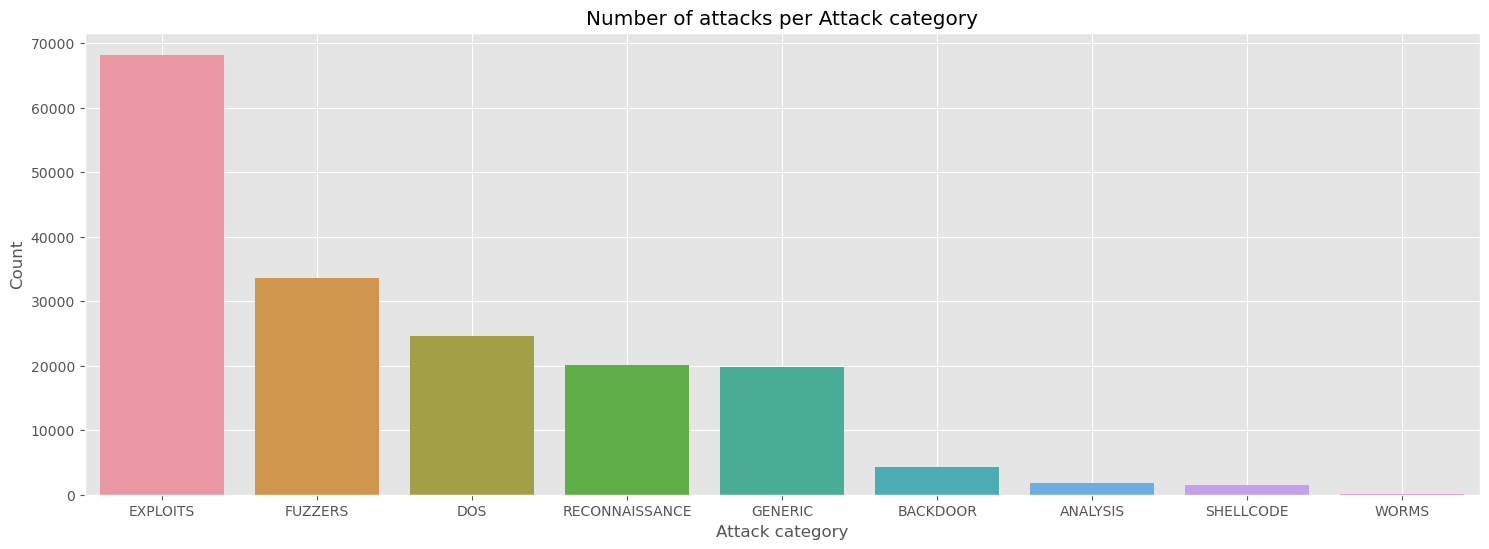

In [107]:
plt.figure(figsize=(18,6))
sns.barplot(x=newdf['Attack category'].value_counts().index, y=newdf['Attack category'].value_counts())

plt.xlabel("Attack category")
plt.ylabel("Count")
plt.title("Number of attacks per Attack category")
plt.grid(True)

plt.show()

In [108]:
# first six shows the most count of attackers

In [109]:
a=pd.DataFrame(newdf['Attack category'].value_counts())[:6]

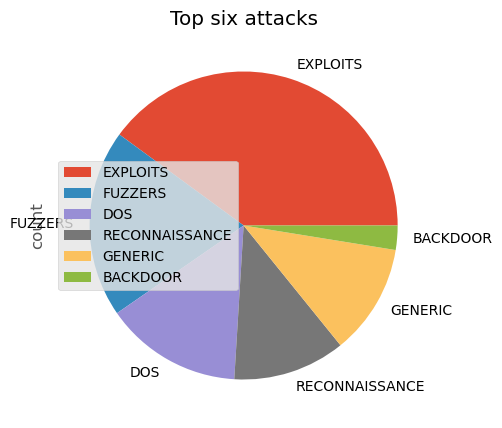

In [110]:
a.plot(kind='pie', subplots=True, figsize=(5,5))
plt.title("Top six attacks")
plt.legend()
plt.show()

In [111]:
newdf['start time']

0         1421927414
1         1421927415
2         1421927416
3         1421927417
4         1421927418
             ...    
174336    1424262066
174337    1424262067
174338    1424262067
174339    1424262068
174340    1424262068
Name: start time, Length: 174341, dtype: object

In [112]:
# converting into date time format

In [113]:
newdf['start time']=pd.to_datetime(newdf['start time'], unit='s')
newdf['last time']=pd.to_datetime(newdf['last time'], unit='s')
newdf['duration']=((newdf['last time']-newdf['start time']).dt.seconds).astype(int)


In [114]:
newdf[:5]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,start time,last time,Destination Port Service,duration
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:24,2015-01-22 11:50:24,HTTP,0
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:24,2015-01-22 11:50:24,NaN,0
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:24,2015-01-22 11:50:24,HTTP,0
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:24,2015-01-22 11:50:24,PERSONAL-AGENT,0
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:24,2015-01-22 11:50:24,HTTP,0


In [115]:
newdf['start time'].astype(str)

0         2015-01-22 11:50:24
1         2015-01-22 11:50:24
2         2015-01-22 11:50:24
3         2015-01-22 11:50:24
4         2015-01-22 11:50:24
                 ...         
174336    2015-02-18 12:20:16
174337    2015-02-18 12:20:16
174338    2015-02-18 12:20:16
174339    2015-02-18 12:20:16
174340    2015-02-18 12:20:16
Name: start time, Length: 174341, dtype: object

In [116]:
newdf['start time'].astype(str).str.split(' ')

0         [2015-01-22, 11:50:24]
1         [2015-01-22, 11:50:24]
2         [2015-01-22, 11:50:24]
3         [2015-01-22, 11:50:24]
4         [2015-01-22, 11:50:24]
                   ...          
174336    [2015-02-18, 12:20:16]
174337    [2015-02-18, 12:20:16]
174338    [2015-02-18, 12:20:16]
174339    [2015-02-18, 12:20:16]
174340    [2015-02-18, 12:20:16]
Name: start time, Length: 174341, dtype: object

In [117]:
newdf['start time'].astype(str).str.split(' ').str[0]

0         2015-01-22
1         2015-01-22
2         2015-01-22
3         2015-01-22
4         2015-01-22
             ...    
174336    2015-02-18
174337    2015-02-18
174338    2015-02-18
174339    2015-02-18
174340    2015-02-18
Name: start time, Length: 174341, dtype: object

In [118]:
newdf['start time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', '2015-02-18'], dtype=object)

### we are going to exucute from now on is based on information relaed to 2 days, 22 jan and 18 feb

In [119]:
newdf.describe()

,Source Port,Destination Port,start time,last time,duration
count,174341.000000,174341.000000,174341,174341,174341.000000
mean,15391.130382,1304.599423,2015-02-16 00:10:45.815545600,2015-02-16 00:10:48.444691712,2.629146
min,0.000000,0.000000,2015-01-22 11:50:24,2015-01-22 11:50:24,0.000000
25%,0.000000,0.000000,2015-02-18 03:07:44,2015-02-18 03:07:44,0.000000
50%,0.000000,0.000000,2015-02-18 05:32:48,2015-02-18 05:32:48,0.000000
75%,31862.000000,80.000000,2015-02-18 09:27:28,2015-02-18 09:27:28,0.000000
max,65535.000000,65535.000000,2015-02-18 12:20:16,2015-02-18 12:20:16,128.000000
std,21707.824000,7466.035607,NaN,NaN,18.155446


#### mean and 75% is very different for sourceport and destination port is very different ,
####howewver minimum and maximum is same, here comes hypothesis testing

In [120]:
# attackers using lower port

In [121]:
# we use hypothesis test , there are two types of hypothesis  1, null hypothesis and 2 , alternative hypothesis

##### the hypothesis test is conductes using a statistical T-test which specifies the two series df_interest['source port'] and
##### df_interest['destination port']. by specifying these two series , we are automatically referring to a comaprative test of the means of both series 

In [122]:
statistic, pvalue=stats.ttest_ind(newdf['Source Port'], newdf['Destination Port'], equal_var=False)
print('p-value in T test :' + str(pvalue))



<IPython.core.display.Javascript object>

p-value in T test :0.0


In [123]:
# much less than alpha values so we reject null hypothesis and do alternative hypothesis

##### Because the p-values is very close to zero, python approximates this measurement to 0.0 , with this in mind we can reject the null hypothesis
##### H0 regarding the equality of the means of the source and destination port . this means that the source port of the attackers is very different from the 
##### destinatio port . in this way , most attackers are directed at aspecific logical ports , which does not leave a random spot.


we will be using two methods for correlation calculatio 

1. pearson correlation :evaluates the linear relationships between two variables
if the value is close to 0, there is a weak or nonexistenet linear relationship between the variables

2.Spearman correlation : evaluate the monotonic relationships between two variables. if the value is closetoo 0 , there is a weak weak or 
nonexistent monotonic relationships between two variables.

In [124]:
newdf.corr(method='spearman')

ValueError: could not convert string to float: 'RECONNAISSANCE'

In [ ]:
newdf.corr(method='spearman')

In [129]:
df_dummies=pd.get_dummies(newdf, columns=['Attack category'])

In [130]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='pearson'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

ValueError: could not convert string to float: 'HTTP'

<Figure size 1800x700 with 0 Axes>

In [131]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

ValueError: could not convert string to float: 'HTTP'

<Figure size 1800x700 with 0 Axes>

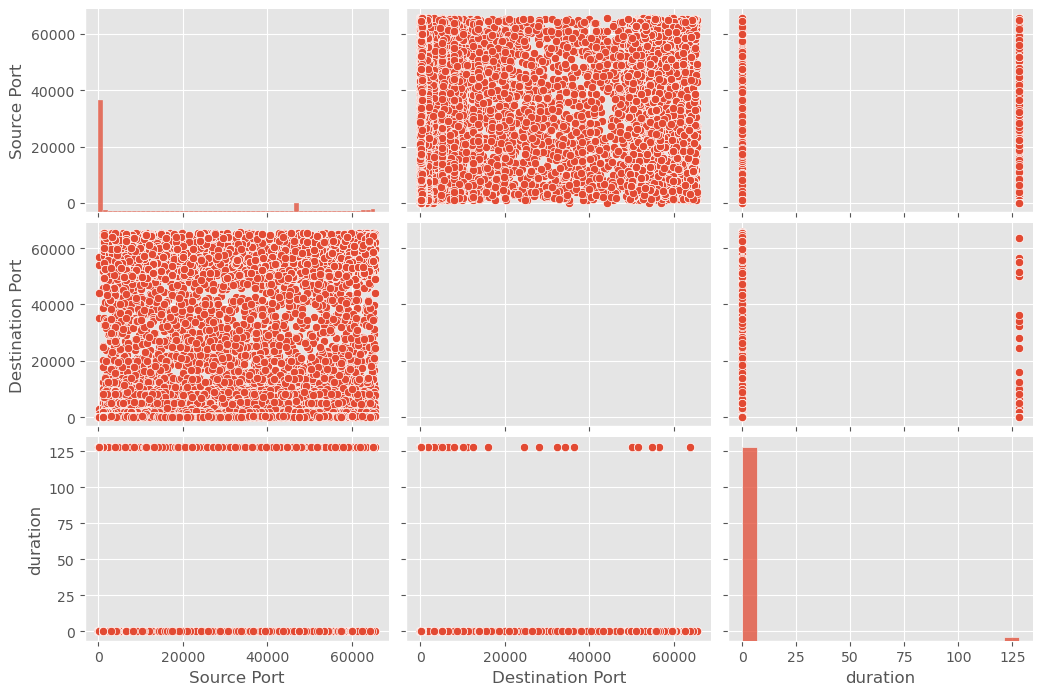

In [132]:
g=sns.pairplot(newdf)
g.fig.set_size_inches(11,7)
plt.show()

In [ ]:
newdf['Destination IP'].value_counts()[:5]

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['start time'].min()-timedelta(days=1),right=newdf['start time'].max()+timedelta(days=1))
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['start time'].min(),right=datetime.strptime('15-01-23', '%y-%m-%d'))
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=datetime.strptime('15-02-18', '%y-%m-%d'),right=newdf['start time'].max())
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='start time', y='Destination Port', hue='Attack category', 
                data=newdf[(newdf['Destination IP']=='149.171.126.17')&(newdf['Destination Port']<=150)], 
                s=65)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))
plt.grid(True)
plt.show()

## duration vs destination port

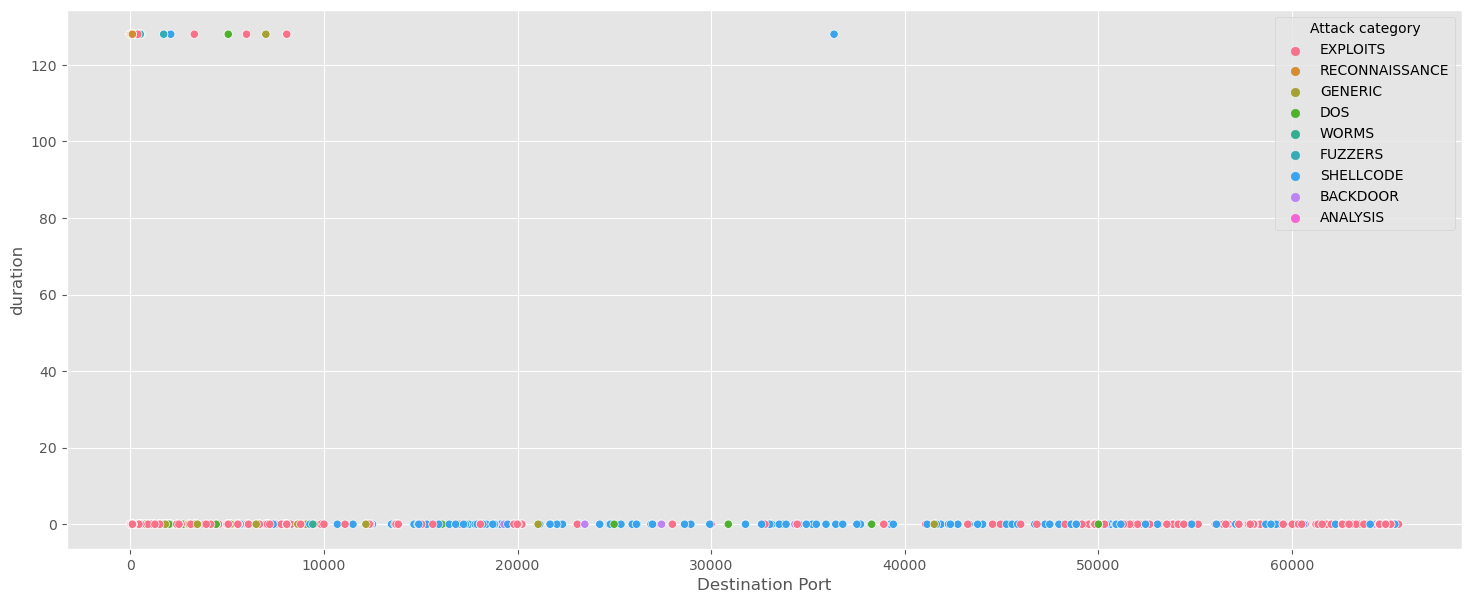

In [133]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Destination Port', y='duration', hue='Attack category', data=newdf[newdf['Destination IP']=='149.171.126.17'])
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(18,7))
sns.violinplot(x='Attack category', y='duration', data=newdf)
plt.grid(True)
plt.show()

In [127]:
def heatmap_graph(df, xlabel, ylabel, title):
    plt.figure(figsize=(18,8))
    ax = sns.heatmap(df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [126]:
newdf["start time"][1].hour

11

In [128]:
df_pivot = newdf.copy()
df_pivot['hour'] = df_pivot.apply(lambda row: '0'*(2-len(str(row['start time'].hour)))+str(row['start time'].hour)+':00:00', axis=1)

In [ ]:
df_pivot[:5]

In [ ]:
df_p1 = pd.pivot_table(df_pivot,values='Attack Name', index=['hour'], columns=['Attack category'], aggfunc='count')
df_p1

In [ ]:
heatmap_graph(df = df_p1, xlabel = 'Attack category', ylabel = 'Hour', title = 'Number of attacks per hour and attack type')

In [ ]:
heatmap_graph(df = df_p1/df_p1.sum(), xlabel = 'Attack category', ylabel = 'Hour', title = 'Porcentage of attacks per hour per attack type')

In [ ]:
df_p2 = pd.pivot_table(df_pivot, values='Attack Name', index=['hour'], columns=['Destination IP'], aggfunc='count')
heatmap_graph(df = df_p2/df_p2.sum(), xlabel = 'Destination IP', ylabel = 'Hour', title = 'Percentage of attacks per IP and hour')

#Although there are more than 170,000 records related to cybersecurity attacks, these attacks target 10 servers with IPv4 addresses in the interval [149.171.126.10,149.171.126.19] . This means that the company was attacked on multiple occasions during the observed timeframe, on a specific subnet, which denotes a non-accidental and directed succession of events.

In [ ]:
df_p3 = pd.pivot_table(df_pivot, values='Attack Name', index=['Destination IP'], columns=['Attack category'], aggfunc='count')
heatmap_graph(df = df_p3/df_p3.sum(), xlabel = 'Attack category', ylabel = 'Destination IP', title = 'Number of attacks per IP and attack type')

The most attacked machine is the one with the IPv4 address 149.171.126.17. Conversely, while worms, shellcode and generic attacks are not directed at particular machines, Denial of Services, Exploits and Backdoor attacks are clearly targeted towards specific servers.